This tutorial's purpose is to introduce people to the [2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE](https://github.com/CSSEGISandData/COVID-19) and how to explore it using some foundational packages in the Scientific Python Data Science stack.

It is not intended to encourage people to create & publish their own data visualizations. In fact, as [this thoughtful essay](https://medium.com/nightingale/ten-considerations-before-you-create-another-chart-about-covid-19-27d3bd691be8) makes clear, in many cases it is irresponsible to publish amateur visualizations, which at best will dilute those that experts with domain expertise are publishing. We won't be making any predictions or doing any statistical modelling, although we may look critically at some other models.

Dashboards such as these inpsired me to put this material together, in order to show people how to dive into the data:

- [Covid-19: active cases and extrapolation](https://covid19-dash.github.io/) by Gaël Varoquaux, Emmanuelle Gouillart, Russell Poldrack, and Guillaume Lemaitre
- [NYC Covid-19 data dashboard](https://smarquez.shinyapps.io/covid_nys_dashboard/) by Sue Marquez
- All of [these dashboards](https://covid19dashboards.com/) contributed to by many and powered by the work of Hamel Husain.


also [this](https://twitter.com/DrDenaGrayson/status/1241143463925645319/photo/1).

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set style & figures inline
sns.set()
%matplotlib inline

In [2]:
confirmed_cases_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
death_cases_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovery_cases_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

## Confirmed

In [3]:
# Import data & check it out
raw_data_confirmed = pd.read_csv(confirmed_cases_data_url)
raw_data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,521,555,607,665,714,784,840,906,933,996
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,416,433,446,467,475,494,518,539,548,562
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,601,601,638,646,659,673,673,696,704,713
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,24,24


In [4]:
raw_data_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 93 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  82 non-null     object 
 1   Country/Region  264 non-null    object 
 2   Lat             264 non-null    float64
 3   Long            264 non-null    float64
 4   1/22/20         264 non-null    int64  
 5   1/23/20         264 non-null    int64  
 6   1/24/20         264 non-null    int64  
 7   1/25/20         264 non-null    int64  
 8   1/26/20         264 non-null    int64  
 9   1/27/20         264 non-null    int64  
 10  1/28/20         264 non-null    int64  
 11  1/29/20         264 non-null    int64  
 12  1/30/20         264 non-null    int64  
 13  1/31/20         264 non-null    int64  
 14  2/1/20          264 non-null    int64  
 15  2/2/20          264 non-null    int64  
 16  2/3/20          264 non-null    int64  
 17  2/4/20          264 non-null    int

In [5]:
raw_data_confirmed.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,21.317326,22.168315,2.102273,2.477273,3.564394,5.431818,8.022727,11.087121,21.128788,23.356061,...,6278.507576,6574.431818,6949.700758,7215.295455,7485.571970,7788.083333,8153.170455,8485.568182,8779.386364,9096.128788
std,24.734994,70.669996,27.382118,27.480921,34.210982,47.612615,66.537101,89.647535,220.011922,221.352587,...,35261.959793,37137.014066,39181.457686,40763.518495,42450.795915,44263.148610,46362.495521,48389.901654,50329.621230,52104.475531
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,6.969250,-20.026050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,32.000000,33.750000,33.750000,39.500000,40.750000,48.000000,48.750000,51.250000,55.000000,55.000000
50%,23.488100,20.535638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,256.500000,265.500000,276.000000,294.500000,304.000000,319.000000,331.500000,335.000000,339.000000,341.500000
75%,41.166075,78.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1269.250000,1305.500000,1314.250000,1352.000000,1379.750000,1407.500000,1533.250000,1575.500000,1615.750000,1654.250000
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,496535.000000,526396.000000,555313.000000,580619.000000,607670.000000,636350.000000,667592.000000,699706.000000,732197.000000,759086.000000


In [6]:
# Group by region
data_day = raw_data_confirmed.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
data_day.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,521,555,607,665,714,784,840,906,933,996
Albania,0,0,0,0,0,0,0,0,0,0,...,416,433,446,467,475,494,518,539,548,562
Algeria,0,0,0,0,0,0,0,0,0,0,...,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629
Andorra,0,0,0,0,0,0,0,0,0,0,...,601,601,638,646,659,673,673,696,704,713
Angola,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,24,24


In [7]:
# The index are the countries, but we want the dates as index, Transpose will make the columns to rows
df = data_day.transpose()

In [8]:
# Melt data so that it is long
data = data_day.reset_index().melt(id_vars='Country/Region', var_name='date')
data.head()

,Country/Region,date,value
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0


In [9]:
data.loc[(data.value < 1),'value'] = None
data.head()

,Country/Region,date,value
0,Afghanistan,1/22/20,NaN
1,Albania,1/22/20,NaN
2,Algeria,1/22/20,NaN
3,Andorra,1/22/20,NaN
4,Angola,1/22/20,NaN


In [10]:
# Pivot data to wide & index by date
df = data.pivot(index='date', columns='Country/Region', values='value')
df.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
4/5/20,349.0,361.0,1320.0,501.0,14.0,15.0,1451.0,822.0,5687.0,12051.0,...,48436.0,400.0,342.0,159.0,241.0,237.0,4.0,NaN,39.0,9.0
4/6/20,367.0,377.0,1423.0,525.0,16.0,15.0,1554.0,833.0,5797.0,12297.0,...,52279.0,406.0,457.0,165.0,245.0,254.0,4.0,NaN,39.0,10.0
4/7/20,423.0,383.0,1468.0,545.0,17.0,19.0,1628.0,853.0,5895.0,12639.0,...,55949.0,424.0,520.0,165.0,249.0,261.0,4.0,NaN,39.0,11.0
4/8/20,444.0,400.0,1572.0,564.0,19.0,19.0,1715.0,881.0,6010.0,12942.0,...,61474.0,424.0,545.0,167.0,251.0,263.0,4.0,NaN,39.0,11.0
4/9/20,484.0,409.0,1666.0,583.0,19.0,19.0,1795.0,921.0,6108.0,13244.0,...,65872.0,456.0,582.0,171.0,255.0,263.0,4.0,NaN,39.0,11.0


In [11]:
# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(df.index)
df.set_index(datetime_index, inplace=True)
df.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN


In [12]:
# Check out index
df.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-02', '2020-02-20', '2020-02-21',
               '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
               '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-03-01',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-02', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
      

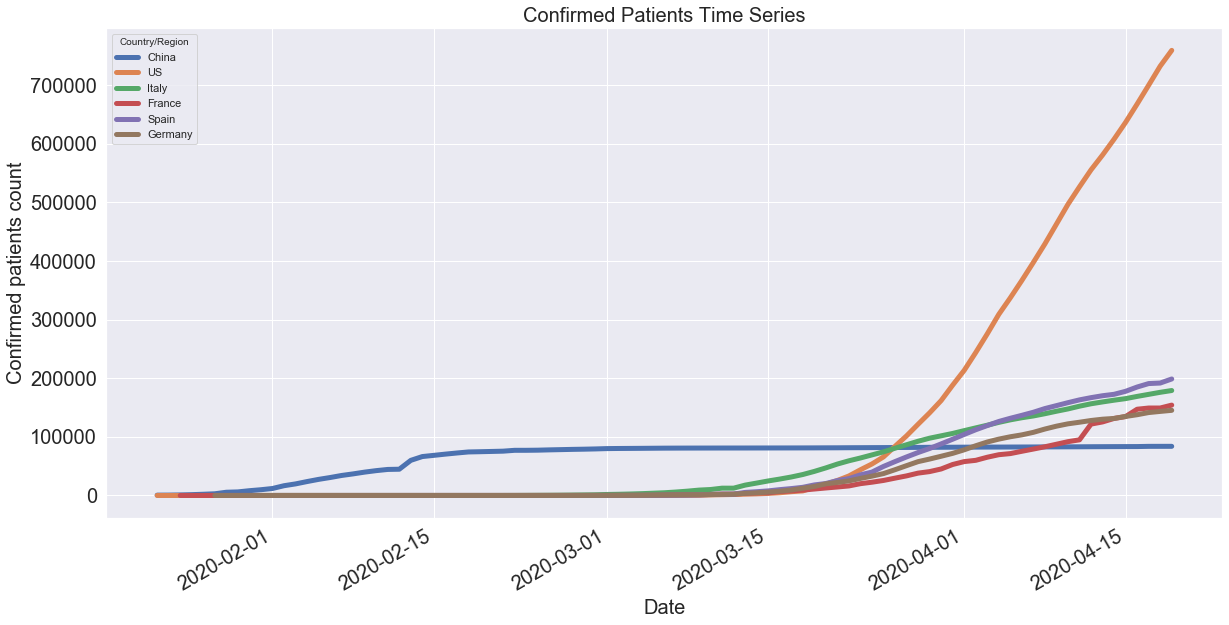

In [13]:
# Plot time series of several countries of interest -- This is a line plot
poi = ['China', 'US', 'Italy', 'France', 'Spain', 'Germany']
df[poi].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Confirmed patients count', fontsize=20);
plt.title('Confirmed Patients Time Series', fontsize=20);

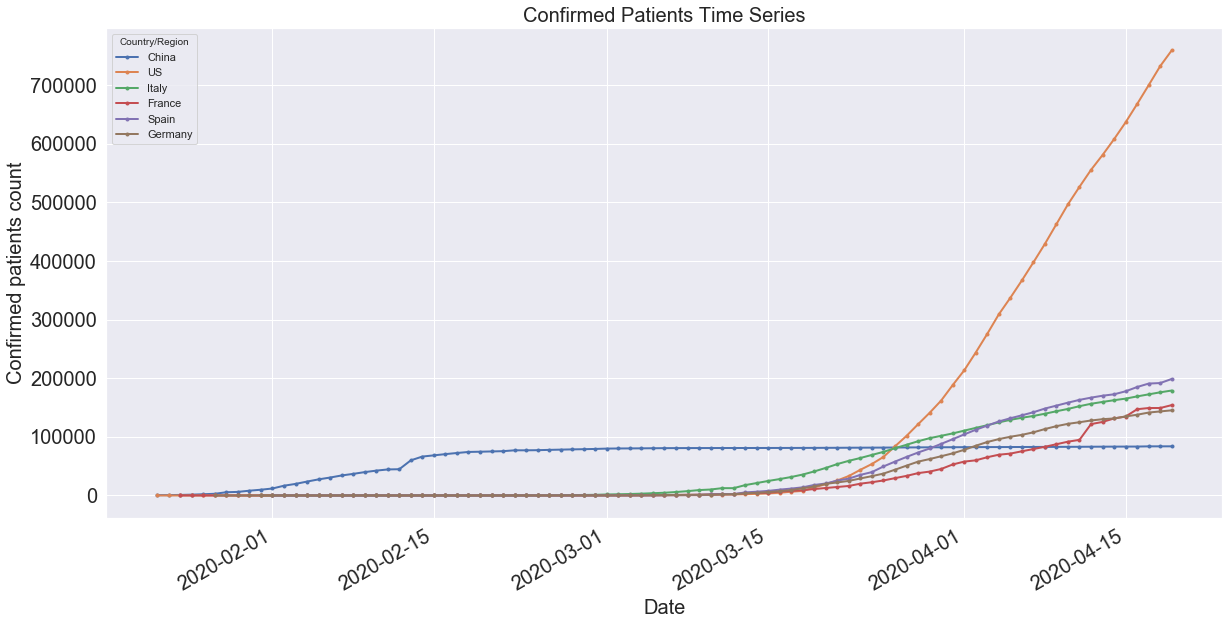

In [14]:
# Plot time series of several countries of interest -- This is a line plot -- with points
poi = ['China', 'US', 'Italy', 'France', 'Spain', 'Germany']
df[poi].plot(figsize=(20,10), linewidth=2, marker = '.', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Confirmed patients count', fontsize=20);
plt.title('Confirmed Patients Time Series', fontsize=20);

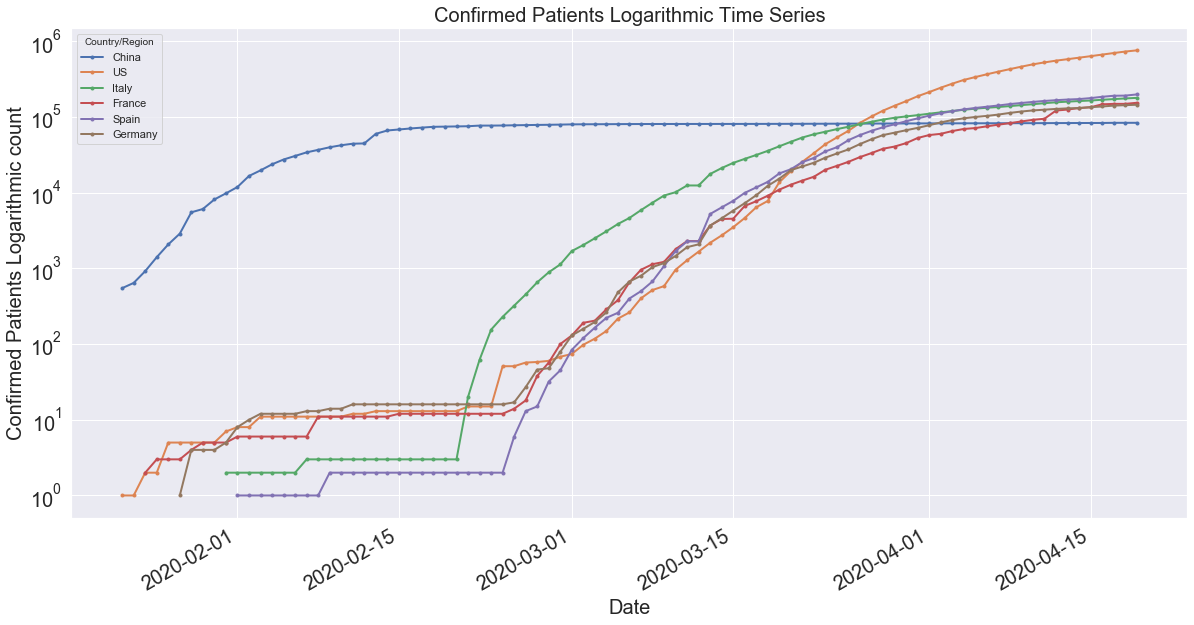

In [15]:
# Plot time series of several countries of interest -- This is a log plot only for the y axis
poi = ['China', 'US', 'Italy', 'France', 'Spain', 'Germany']
df[poi].plot(figsize=(20,10), linewidth=2, marker = '.', fontsize=20, logy=True)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Confirmed Patients Logarithmic count', fontsize=20);
plt.title('Confirmed Patients Logarithmic Time Series', fontsize=20);

## Deaths

[This](https://www.nytimes.com/interactive/2020/03/21/upshot/coronavirus-deaths-by-country.html) and [this](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html).

In [16]:
# Import data & check it out
raw_data_deaths = pd.read_csv(death_cases_data_url)
raw_data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,15,18,18,21,23,25,30,30,30,33
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,23,23,23,23,24,25,26,26,26,26
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,256,275,293,313,326,336,348,364,367,375
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,26,26,29,29,31,33,33,35,35,36
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [17]:
# Group by region
data_day = raw_data_deaths.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
df = data_day.transpose()
# Melt data so that it is long
data = data_day.reset_index().melt(id_vars='Country/Region', var_name='date')
#
data.loc[(data.value < 25),'value'] = None
# Pivot data to wide & index by date
df = data.pivot(index='date', columns='Country/Region', values='value')
# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(df.index)
df.set_index(datetime_index, inplace=True)

In [18]:
df.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-04-05,NaN,NaN,152.0,NaN,NaN,NaN,44.0,NaN,35.0,204.0,...,4943.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-06,NaN,NaN,173.0,NaN,NaN,NaN,48.0,NaN,40.0,220.0,...,5385.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,NaN,NaN,193.0,NaN,NaN,NaN,56.0,NaN,45.0,243.0,...,6171.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-08,NaN,NaN,205.0,NaN,NaN,NaN,63.0,NaN,50.0,273.0,...,7111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-09,NaN,NaN,235.0,25.0,NaN,NaN,72.0,NaN,51.0,295.0,...,7993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


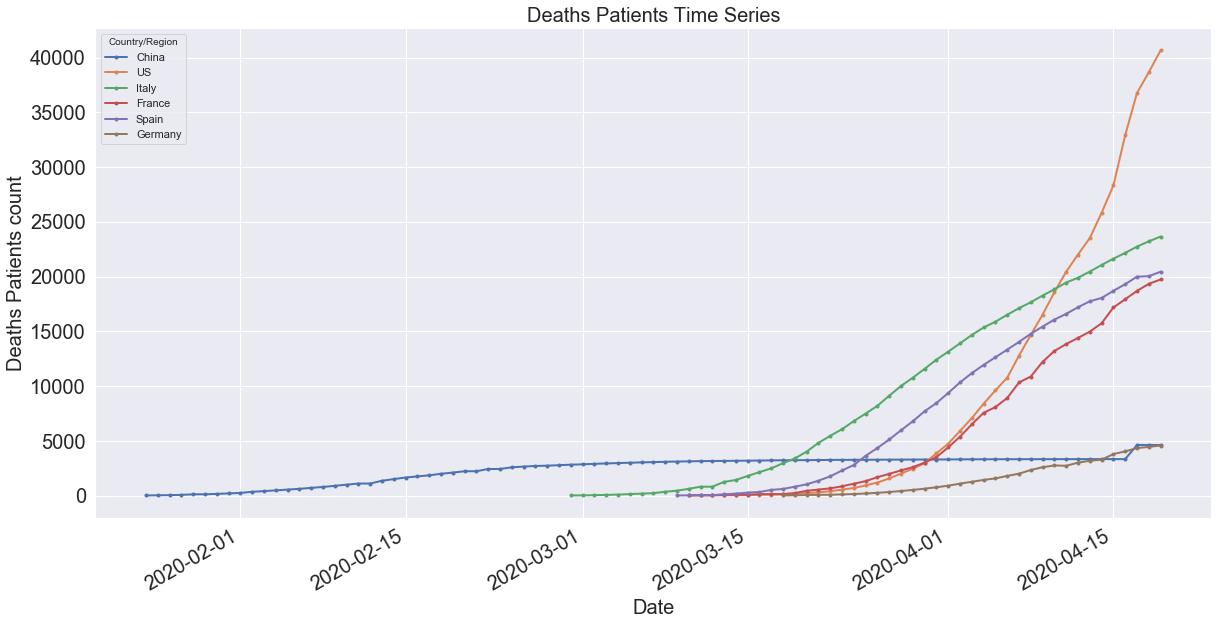

In [19]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Spain', 'Germany']
df[poi].plot(figsize=(20,10), linewidth=2, marker = '.', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Deaths Patients count', fontsize=20);
plt.title('Deaths Patients Time Series', fontsize=20);

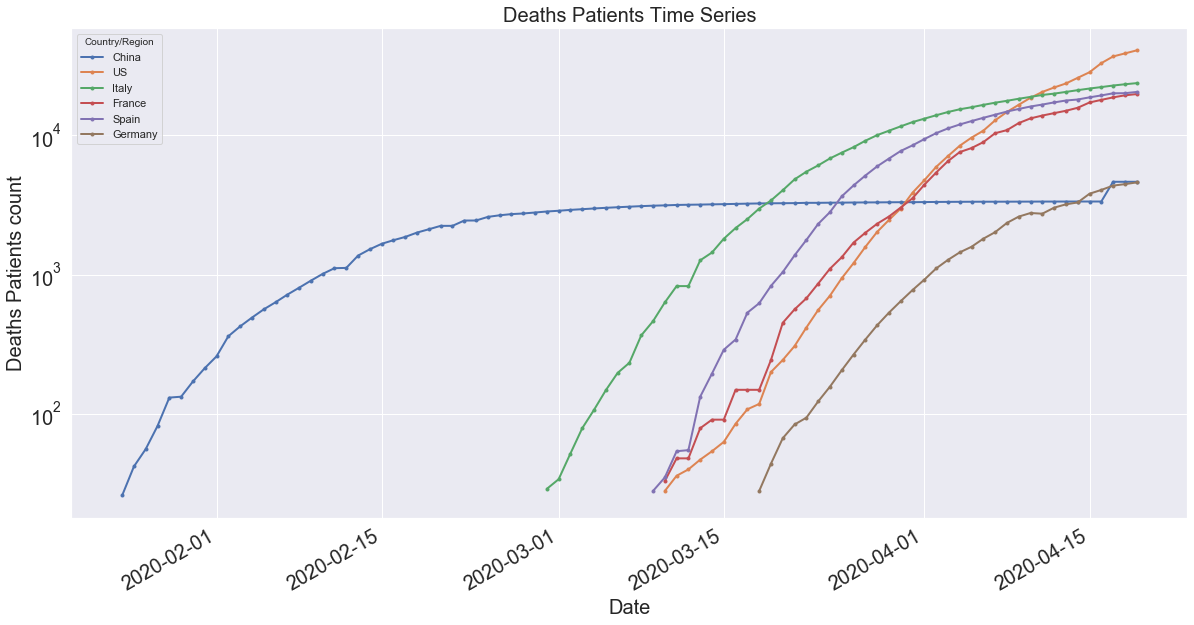

In [20]:
# Plot time series of several countries of interest -- Logarithmic in the y axis
poi = ['China', 'US', 'Italy', 'France', 'Spain', 'Germany']
df[poi].plot(figsize=(20,10), linewidth=2, marker = '.', fontsize=20, logy = True)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Deaths Patients count', fontsize=20);
plt.title('Deaths Patients Time Series', fontsize=20);

## Aligning growth curves to start with day of number of know deaths >= 25

In [21]:
df.dropna(axis=1, how='all', inplace=True)
df.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Argentina,Australia,Austria,Bangladesh,Belarus,Belgium,...,Spain,Sweden,Switzerland,Thailand,Tunisia,Turkey,US,Ukraine,United Arab Emirates,United Kingdom
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df = df.sort_index()
df1 = df.reset_index().drop(['date'], axis=1)
df1.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Argentina,Australia,Austria,Bangladesh,Belarus,Belgium,...,Spain,Sweden,Switzerland,Thailand,Tunisia,Turkey,US,Ukraine,United Arab Emirates,United Kingdom
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
for col in df1.columns:
    print(col, df1[col].first_valid_index())
    df1[col] = df1[col].shift(-df1[col].first_valid_index())

Afghanistan 84
Albania 84
Algeria 64
Andorra 78
Argentina 69
Australia 72
Austria 62
Bangladesh 79
Belarus 81
Belgium 58
Bolivia 82
Bosnia and Herzegovina 75
Brazil 60
Bulgaria 79
Burkina Faso 80
Cameroon 88
Canada 61
Chile 73
China 2
Colombia 72
Congo (Kinshasa) 87
Croatia 82
Cuba 85
Czechia 69
Denmark 62
Dominican Republic 66
Ecuador 62
Egypt 65
Estonia 81
Finland 73
France 48
Germany 56
Greece 64
Honduras 81
Hungary 72
India 67
Indonesia 57
Iran 36
Iraq 62
Ireland 66
Israel 70
Italy 38
Japan 54
Korea, South 40
Lithuania 83
Luxembourg 70
Malaysia 65
Mexico 69
Moldova 77
Morocco 66
Netherlands 55
North Macedonia 76
Norway 67
Pakistan 69
Panama 69
Peru 69
Philippines 60
Poland 68
Portugal 62
Romania 65
Russia 71
San Marino 68
Saudi Arabia 72
Serbia 70
Slovenia 74
South Africa 80
Spain 47
Sweden 61
Switzerland 55
Thailand 75
Tunisia 78
Turkey 60
US 48
Ukraine 72
United Arab Emirates 82
United Kingdom 54


In [24]:
df2 = df1.apply(lambda x: x.shift(-x.first_valid_index()))

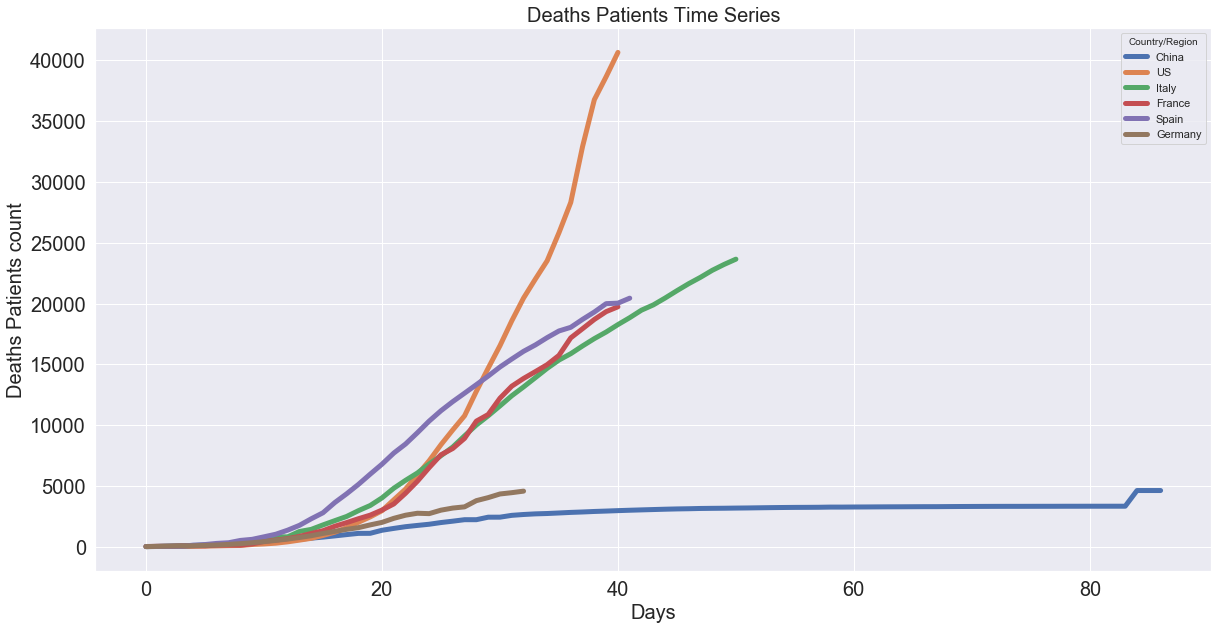

In [25]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Spain', 'Germany']
df2[poi].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Days', fontsize=20);
plt.ylabel('Deaths Patients count', fontsize=20);
plt.title('Deaths Patients Time Series', fontsize=20);

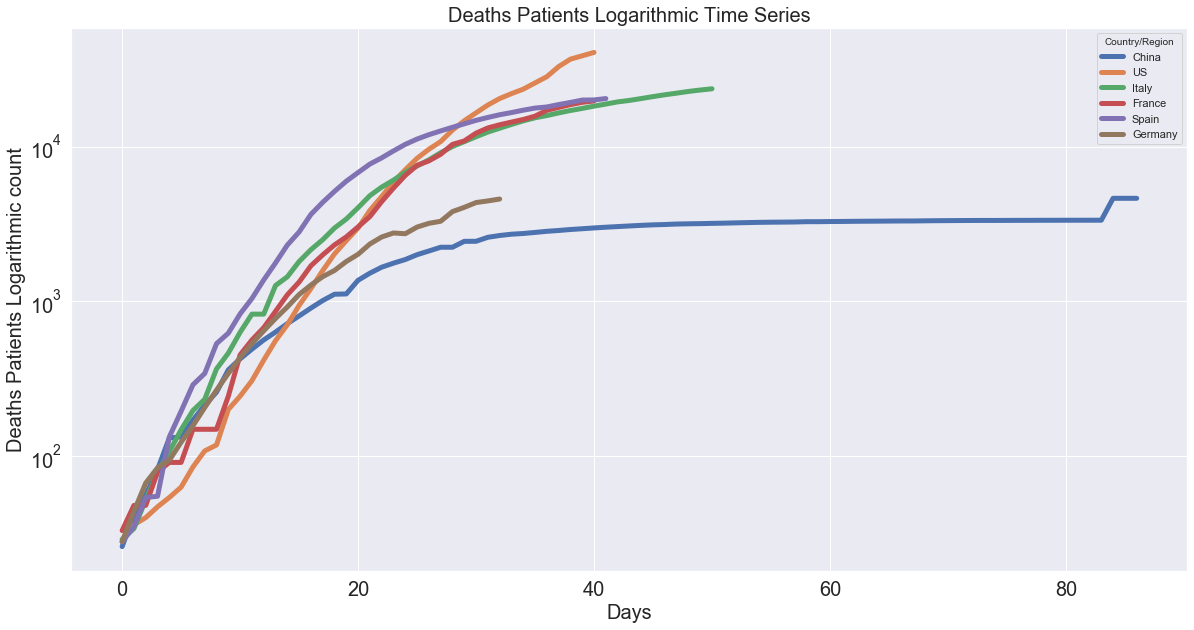

In [26]:
# Plot time series of several countries of interest -- log in the y axis
poi = ['China', 'US', 'Italy', 'France', 'Spain', 'Germany']
df2[poi].plot(figsize=(20,10), linewidth=5, fontsize=20, logy=True)
plt.xlabel('Days', fontsize=20);
plt.ylabel('Deaths Patients Logarithmic count', fontsize=20);
plt.title('Deaths Patients Logarithmic Time Series', fontsize=20);

## Functions

In [42]:
# Function for grouping countries by region
def grouping_by_region(raw_data, min_val):
    data_day = raw_data.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
    df_t = data_day.transpose()
    # Melt data so that it is long
    data = data_day.reset_index().melt(id_vars='Country/Region', var_name='date')
    #
    data.loc[(data.value < min_val),'value'] = None
    # Pivot data to wide & index by date
    df_t = data.pivot(index='date', columns='Country/Region', values='value')
    # Set index as DateTimeIndex
    datetime_index = pd.DatetimeIndex(df_t.index)
    df_t.set_index(datetime_index, inplace=True)
    return df_t

In [43]:
# Function to plot time series of several countries of interest
def plot_time_series(df, plot_title, x_label, y_label, isLogY=False):
    df.plot(figsize=(20,10), linewidth=5, fontsize=20, logy=isLogY)
    plt.xlabel(x_label, fontsize=20);
    plt.ylabel(y_label, fontsize=20);
    plt.title(plot_title, fontsize=20);

In [44]:
# Function to manipulate the data
def data_manipulation(df):
    df.dropna(axis=1, how='all', inplace=True)
    df = df.sort_index()
    df1 = df.reset_index().drop(['date'], axis=1)
    
    for col in df1.columns:
        print(col, df1[col].first_valid_index())
        df1[col] = df1[col].shift(-df1[col].first_valid_index())
        
    df2 = df1.apply(lambda x: x.shift(-x.first_valid_index()))
    return df2

## Recovered

In [45]:
# Import data & check it out
raw_data_recovered = pd.read_csv(recovery_cases_data_url)
raw_data_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2,5,5,10,10,10,15,18,18,29
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,44,52,67,76,89,99,104,116,131,154
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,37,46,61,61,62,90,90,90,113,237
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,10,10,10,10,16,21,26,31,39,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,1,1,1,1,2,2,2,2,2


In [46]:
df = grouping_by_region(raw_data_recovered, 50)
df.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-04-04,NaN,99.0,90.0,NaN,NaN,NaN,279.0,NaN,701.0,2507.0,...,125.0,215.0,93.0,NaN,52.0,90.0,NaN,NaN,NaN,NaN
2020-04-05,NaN,104.0,90.0,NaN,NaN,NaN,280.0,57.0,757.0,2998.0,...,144.0,229.0,93.0,NaN,52.0,90.0,NaN,NaN,NaN,NaN
2020-04-06,NaN,116.0,90.0,NaN,NaN,NaN,325.0,62.0,1080.0,3463.0,...,167.0,287.0,104.0,NaN,65.0,95.0,NaN,NaN,NaN,NaN
2020-04-07,NaN,131.0,113.0,NaN,NaN,NaN,338.0,87.0,1080.0,4046.0,...,186.0,325.0,150.0,NaN,65.0,123.0,NaN,NaN,NaN,NaN
2020-04-08,NaN,154.0,237.0,52.0,NaN,NaN,358.0,114.0,1080.0,4512.0,...,239.0,345.0,150.0,NaN,65.0,126.0,NaN,NaN,NaN,NaN


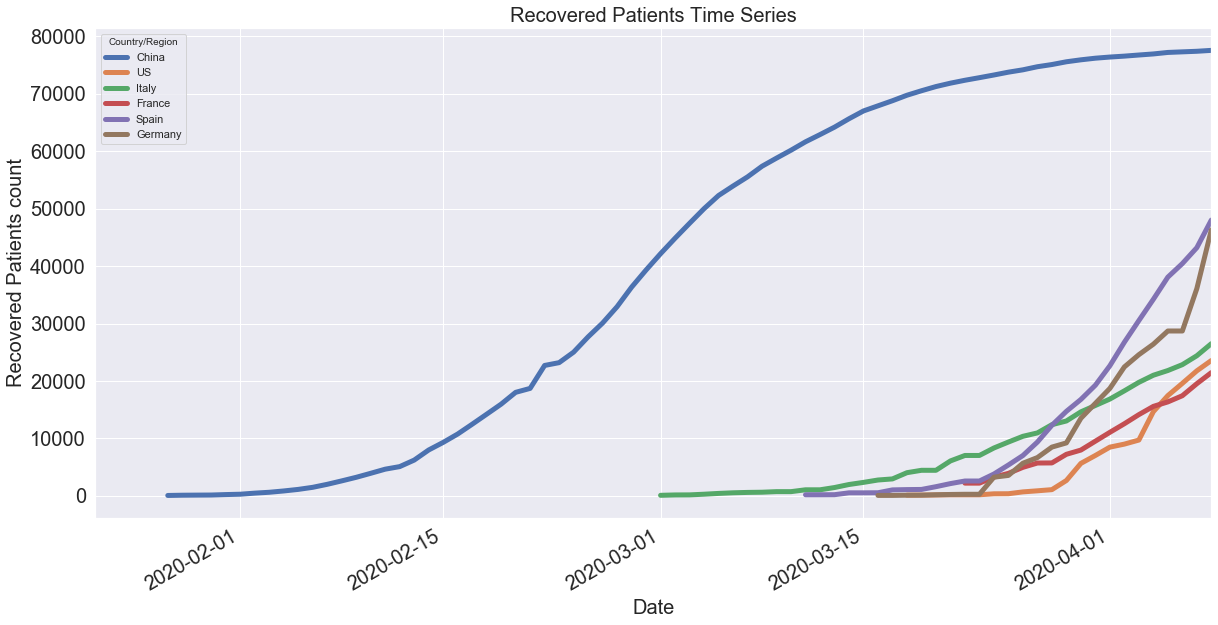

In [47]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Spain', 'Germany']
plot_time_series(df[poi], 'Recovered Patients Time Series', 'Date', 'Recovered Patients count', False)

In [48]:
clean_df = data_manipulation(df)

Albania 69
Algeria 60
Andorra 77
Argentina 62
Armenia 74
Australia 60
Austria 64
Azerbaijan 77
Bahrain 53
Belarus 70
Belgium 59
Bosnia and Herzegovina 76
Brazil 68
Brunei 70
Burkina Faso 71
Cambodia 73
Cameroon 77
Canada 62
Chile 66
China 5
Colombia 71
Croatia 67
Cyprus 77
Czechia 70
Denmark 64
Diamond Princess 49
Dominican Republic 77
Ecuador 69
Egypt 60
Estonia 73
Finland 71
France 60
Georgia 77
Germany 54
Greece 65
Hungary 73
Iceland 62
India 65
Indonesia 66
Iran 37
Iraq 59
Israel 62
Italy 39
Japan 45
Jordan 72
Kazakhstan 76
Korea, South 44
Kuwait 65
Lebanon 72
Liechtenstein 75
Luxembourg 69
Malaysia 56
Mexico 72
Morocco 72
Netherlands 67
New Zealand 66
Oman 71
Pakistan 68
Peru 68
Philippines 70
Poland 71
Portugal 71
Qatar 68
Romania 59
Russia 67
Saudi Arabia 67
Senegal 71
Singapore 32
Slovenia 71
South Africa 70
Spain 49
Sweden 70
Switzerland 60
Taiwan* 72
Thailand 62
Turkey 66
US 56
United Arab Emirates 63
United Kingdom 55
Uruguay 71
Venezuela 72
Vietnam 68


In [49]:
clean_df.head()

Country/Region,Albania,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Belarus,...,Switzerland,Taiwan*,Thailand,Turkey,US,United Arab Emirates,United Kingdom,Uruguay,Venezuela,Vietnam
0,52.0,65.0,52.0,52.0,57.0,88.0,112.0,63.0,60.0,53.0,...,131.0,50.0,52.0,70.0,105.0,52.0,53.0,62.0,52.0,55.0
1,67.0,65.0,NaN,52.0,62.0,88.0,225.0,NaN,77.0,53.0,...,131.0,50.0,70.0,105.0,121.0,52.0,67.0,68.0,52.0,58.0
2,76.0,NaN,NaN,63.0,87.0,115.0,225.0,NaN,81.0,53.0,...,131.0,50.0,88.0,162.0,147.0,52.0,67.0,93.0,52.0,63.0
3,89.0,65.0,NaN,72.0,114.0,119.0,479.0,NaN,88.0,53.0,...,131.0,57.0,97.0,243.0,176.0,52.0,67.0,93.0,65.0,75.0
4,99.0,NaN,NaN,72.0,NaN,172.0,636.0,NaN,100.0,52.0,...,131.0,57.0,97.0,333.0,178.0,58.0,67.0,104.0,65.0,85.0


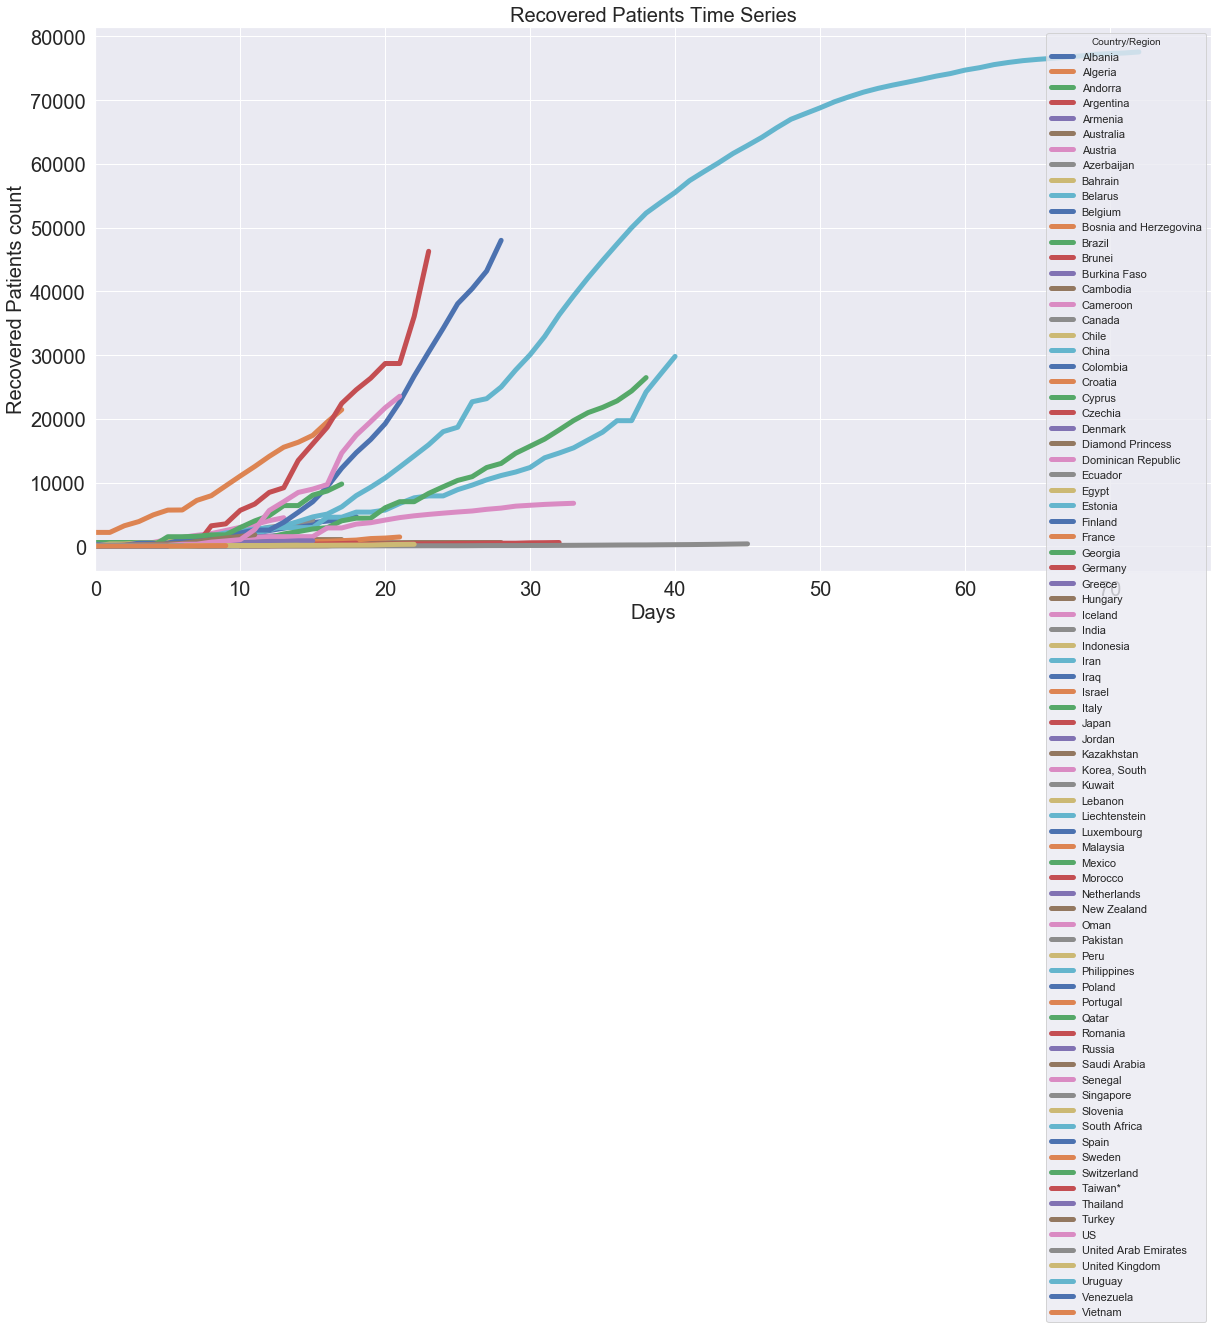

In [50]:
plot_time_series(clean_df, 'Recovered Patients Time Series', 'Days', 'Recovered Patients count', False)

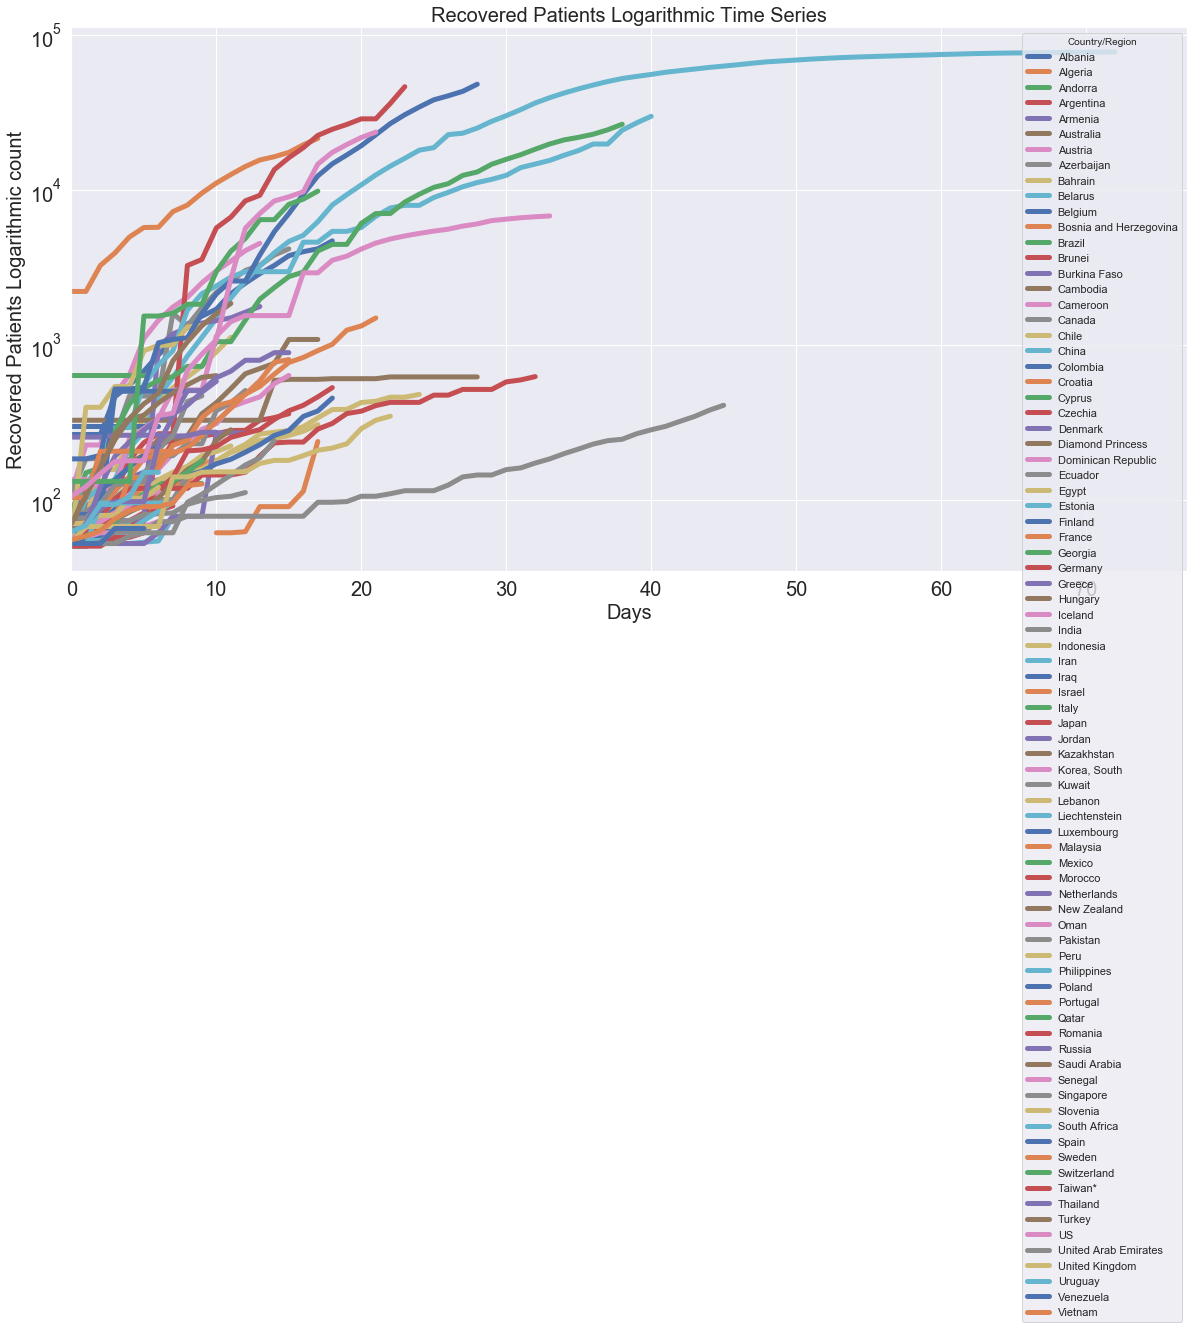

In [51]:
plot_time_series(clean_df, 'Recovered Patients Logarithmic Time Series', 'Days', 'Recovered Patients Logarithmic count', True)